In \[1\]:

    # Import necessary libraries
    import pandas as pd
    import numpy as np
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import seaborn as sns

In \[2\]:

    # Load the dataset
    data = pd.read_csv('customer data.csv')

In \[3\]:

    # Explore the dataset
    print(data.head())

       CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
    0           1    Male   19                  15              39
    1           2    Male   21                  15              81
    2           3  Female   20                  16               6
    3           4  Female   23                  16              77
    4           5  Female   31                  17              40

In \[4\]:

    data.tail()

Out\[4\]:

|     | CustomerID | Genre  | Age | Annual_Income\_(k\$) | Spending_Score |
|-----|------------|--------|-----|----------------------|----------------|
| 195 | 196        | Female | 35  | 120                  | 79             |
| 196 | 197        | Female | 45  | 126                  | 28             |
| 197 | 198        | Male   | 32  | 126                  | 74             |
| 198 | 199        | Male   | 32  | 137                  | 18             |
| 199 | 200        | Male   | 30  | 137                  | 83             |

In \[5\]:

    data.info

Out\[5\]:

    <bound method DataFrame.info of      CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
    0             1    Male   19                  15              39
    1             2    Male   21                  15              81
    2             3  Female   20                  16               6
    3             4  Female   23                  16              77
    4             5  Female   31                  17              40
    ..          ...     ...  ...                 ...             ...
    195         196  Female   35                 120              79
    196         197  Female   45                 126              28
    197         198    Male   32                 126              74
    198         199    Male   32                 137              18
    199         200    Male   30                 137              83

    [200 rows x 5 columns]>

In \[6\]:

    data.describe

Out\[6\]:

    <bound method NDFrame.describe of      CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
    0             1    Male   19                  15              39
    1             2    Male   21                  15              81
    2             3  Female   20                  16               6
    3             4  Female   23                  16              77
    4             5  Female   31                  17              40
    ..          ...     ...  ...                 ...             ...
    195         196  Female   35                 120              79
    196         197  Female   45                 126              28
    197         198    Male   32                 126              74
    198         199    Male   32                 137              18
    199         200    Male   30                 137              83

    [200 rows x 5 columns]>

In \[7\]:

    data.shape

Out\[7\]:

    (200, 5)

In \[8\]:

    data.size

Out\[8\]:

    1000

In \[9\]:

    data.columns

Out\[9\]:

    Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In \[10\]:

    data.isnull

Out\[10\]:

    <bound method DataFrame.isnull of      CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
    0             1    Male   19                  15              39
    1             2    Male   21                  15              81
    2             3  Female   20                  16               6
    3             4  Female   23                  16              77
    4             5  Female   31                  17              40
    ..          ...     ...  ...                 ...             ...
    195         196  Female   35                 120              79
    196         197  Female   45                 126              28
    197         198    Male   32                 126              74
    198         199    Male   32                 137              18
    199         200    Male   30                 137              83

    [200 rows x 5 columns]>

In \[11\]:

    # Check for missing values
    print(data.isnull().sum())

    CustomerID            0
    Genre                 0
    Age                   0
    Annual_Income_(k$)    0
    Spending_Score        0
    dtype: int64

In \[12\]:

    # Remove any rows with missing values
    data.dropna(inplace=True)

In \[13\]:

    data

Out\[13\]:

|     | CustomerID | Genre  | Age | Annual_Income\_(k\$) | Spending_Score |
|-----|------------|--------|-----|----------------------|----------------|
| 0   | 1          | Male   | 19  | 15                   | 39             |
| 1   | 2          | Male   | 21  | 15                   | 81             |
| 2   | 3          | Female | 20  | 16                   | 6              |
| 3   | 4          | Female | 23  | 16                   | 77             |
| 4   | 5          | Female | 31  | 17                   | 40             |
| ... | ...        | ...    | ... | ...                  | ...            |
| 195 | 196        | Female | 35  | 120                  | 79             |
| 196 | 197        | Female | 45  | 126                  | 28             |
| 197 | 198        | Male   | 32  | 126                  | 74             |
| 198 | 199        | Male   | 32  | 137                  | 18             |
| 199 | 200        | Male   | 30  | 137                  | 83             |

200 rows × 5 columns

In \[15\]:

    # Select relevant features for clustering
    features = data[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

In \[16\]:

    features

Out\[16\]:

|     | Age | Annual_Income\_(k\$) | Spending_Score |
|-----|-----|----------------------|----------------|
| 0   | 19  | 15                   | 39             |
| 1   | 21  | 15                   | 81             |
| 2   | 20  | 16                   | 6              |
| 3   | 23  | 16                   | 77             |
| 4   | 31  | 17                   | 40             |
| ... | ... | ...                  | ...            |
| 195 | 35  | 120                  | 79             |
| 196 | 45  | 126                  | 28             |
| 197 | 32  | 126                  | 74             |
| 198 | 32  | 137                  | 18             |
| 199 | 30  | 137                  | 83             |

200 rows × 3 columns

In \[17\]:

    # Scale the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

In \[18\]:

    scaled_features

Out\[18\]:

    array([[-1.42456879, -1.73899919, -0.43480148],
           [-1.28103541, -1.73899919,  1.19570407],
           [-1.3528021 , -1.70082976, -1.71591298],
           [-1.13750203, -1.70082976,  1.04041783],
           [-0.56336851, -1.66266033, -0.39597992],
           [-1.20926872, -1.66266033,  1.00159627],
           [-0.27630176, -1.62449091, -1.71591298],
           [-1.13750203, -1.62449091,  1.70038436],
           [ 1.80493225, -1.58632148, -1.83237767],
           [-0.6351352 , -1.58632148,  0.84631002],
           [ 2.02023231, -1.58632148, -1.4053405 ],
           [-0.27630176, -1.58632148,  1.89449216],
           [ 1.37433211, -1.54815205, -1.36651894],
           [-1.06573534, -1.54815205,  1.04041783],
           [-0.13276838, -1.54815205, -1.44416206],
           [-1.20926872, -1.54815205,  1.11806095],
           [-0.27630176, -1.50998262, -0.59008772],
           [-1.3528021 , -1.50998262,  0.61338066],
           [ 0.94373197, -1.43364376, -0.82301709],
           [-0.27630176, -1.43364376,  1.8556706 ],
           [-0.27630176, -1.39547433, -0.59008772],
           [-0.99396865, -1.39547433,  0.88513158],
           [ 0.51313183, -1.3573049 , -1.75473454],
           [-0.56336851, -1.3573049 ,  0.88513158],
           [ 1.08726535, -1.24279661, -1.4053405 ],
           [-0.70690189, -1.24279661,  1.23452563],
           [ 0.44136514, -1.24279661, -0.7065524 ],
           [-0.27630176, -1.24279661,  0.41927286],
           [ 0.08253169, -1.20462718, -0.74537397],
           [-1.13750203, -1.20462718,  1.42863343],
           [ 1.51786549, -1.16645776, -1.7935561 ],
           [-1.28103541, -1.16645776,  0.88513158],
           [ 1.01549866, -1.05194947, -1.7935561 ],
           [-1.49633548, -1.05194947,  1.62274124],
           [ 0.7284319 , -1.05194947, -1.4053405 ],
           [-1.28103541, -1.05194947,  1.19570407],
           [ 0.22606507, -1.01378004, -1.28887582],
           [-0.6351352 , -1.01378004,  0.88513158],
           [-0.20453507, -0.89927175, -0.93948177],
           [-1.3528021 , -0.89927175,  0.96277471],
           [ 1.87669894, -0.86110232, -0.59008772],
           [-1.06573534, -0.86110232,  1.62274124],
           [ 0.65666521, -0.82293289, -0.55126616],
           [-0.56336851, -0.82293289,  0.41927286],
           [ 0.7284319 , -0.82293289, -0.86183865],
           [-1.06573534, -0.82293289,  0.5745591 ],
           [ 0.80019859, -0.78476346,  0.18634349],
           [-0.85043527, -0.78476346, -0.12422899],
           [-0.70690189, -0.78476346, -0.3183368 ],
           [-0.56336851, -0.78476346, -0.3183368 ],
           [ 0.7284319 , -0.70842461,  0.06987881],
           [-0.41983513, -0.70842461,  0.38045129],
           [-0.56336851, -0.67025518,  0.14752193],
           [ 1.4460988 , -0.67025518,  0.38045129],
           [ 0.80019859, -0.67025518, -0.20187212],
           [ 0.58489852, -0.67025518, -0.35715836],
           [ 0.87196528, -0.63208575, -0.00776431],
           [ 2.16376569, -0.63208575, -0.16305055],
           [-0.85043527, -0.55574689,  0.03105725],
           [ 1.01549866, -0.55574689, -0.16305055],
           [ 2.23553238, -0.55574689,  0.22516505],
           [-1.42456879, -0.55574689,  0.18634349],
           [ 2.02023231, -0.51757746,  0.06987881],
           [ 1.08726535, -0.51757746,  0.34162973],
           [ 1.73316556, -0.47940803,  0.03105725],
           [-1.49633548, -0.47940803,  0.34162973],
           [ 0.29783176, -0.47940803, -0.00776431],
           [ 2.091999  , -0.47940803, -0.08540743],
           [-1.42456879, -0.47940803,  0.34162973],
           [-0.49160182, -0.47940803, -0.12422899],
           [ 2.23553238, -0.4412386 ,  0.18634349],
           [ 0.58489852, -0.4412386 , -0.3183368 ],
           [ 1.51786549, -0.40306917, -0.04658587],
           [ 1.51786549, -0.40306917,  0.22516505],
           [ 1.4460988 , -0.25039146, -0.12422899],
           [-0.92220196, -0.25039146,  0.14752193],
           [ 0.44136514, -0.25039146,  0.10870037],
           [ 0.08253169, -0.25039146, -0.08540743],
           [-1.13750203, -0.25039146,  0.06987881],
           [ 0.7284319 , -0.25039146, -0.3183368 ],
           [ 1.30256542, -0.25039146,  0.03105725],
           [-0.06100169, -0.25039146,  0.18634349],
           [ 2.02023231, -0.25039146, -0.35715836],
           [ 0.51313183, -0.25039146, -0.24069368],
           [-1.28103541, -0.25039146,  0.26398661],
           [ 0.65666521, -0.25039146, -0.16305055],
           [ 1.15903204, -0.13588317,  0.30280817],
           [-1.20926872, -0.13588317,  0.18634349],
           [-0.34806844, -0.09771374,  0.38045129],
           [ 0.80019859, -0.09771374, -0.16305055],
           [ 2.091999  , -0.05954431,  0.18634349],
           [-1.49633548, -0.05954431, -0.35715836],
           [ 0.65666521, -0.02137488, -0.04658587],
           [ 0.08253169, -0.02137488, -0.39597992],
           [-0.49160182, -0.02137488, -0.3183368 ],
           [-1.06573534, -0.02137488,  0.06987881],
           [ 0.58489852, -0.02137488, -0.12422899],
           [-0.85043527, -0.02137488, -0.00776431],
           [ 0.65666521,  0.01679455, -0.3183368 ],
           [-1.3528021 ,  0.01679455, -0.04658587],
           [-1.13750203,  0.05496398, -0.35715836],
           [ 0.7284319 ,  0.05496398, -0.08540743],
           [ 2.02023231,  0.05496398,  0.34162973],
           [-0.92220196,  0.05496398,  0.18634349],
           [ 0.7284319 ,  0.05496398,  0.22516505],
           [-1.28103541,  0.05496398, -0.3183368 ],
           [ 1.94846562,  0.09313341, -0.00776431],
           [ 1.08726535,  0.09313341, -0.16305055],
           [ 2.091999  ,  0.09313341, -0.27951524],
           [ 1.94846562,  0.09313341, -0.08540743],
           [ 1.87669894,  0.09313341,  0.06987881],
           [-1.42456879,  0.09313341,  0.14752193],
           [-0.06100169,  0.13130284, -0.3183368 ],
           [-1.42456879,  0.13130284, -0.16305055],
           [-1.49633548,  0.16947227, -0.08540743],
           [-1.42456879,  0.16947227, -0.00776431],
           [ 1.73316556,  0.16947227, -0.27951524],
           [ 0.7284319 ,  0.16947227,  0.34162973],
           [ 0.87196528,  0.24581112, -0.27951524],
           [ 0.80019859,  0.24581112,  0.26398661],
           [-0.85043527,  0.24581112,  0.22516505],
           [-0.06100169,  0.24581112, -0.39597992],
           [ 0.08253169,  0.32214998,  0.30280817],
           [ 0.010765  ,  0.32214998,  1.58391968],
           [-1.13750203,  0.36031941, -0.82301709],
           [-0.56336851,  0.36031941,  1.04041783],
           [ 0.29783176,  0.39848884, -0.59008772],
           [ 0.08253169,  0.39848884,  1.73920592],
           [ 1.4460988 ,  0.39848884, -1.52180518],
           [-0.06100169,  0.39848884,  0.96277471],
           [ 0.58489852,  0.39848884, -1.5994483 ],
           [ 0.010765  ,  0.39848884,  0.96277471],
           [-0.99396865,  0.43665827, -0.62890928],
           [-0.56336851,  0.43665827,  0.80748846],
           [-1.3528021 ,  0.4748277 , -1.75473454],
           [-0.70690189,  0.4748277 ,  1.46745499],
           [ 0.36959845,  0.4748277 , -1.67709142],
           [-0.49160182,  0.4748277 ,  0.88513158],
           [-1.42456879,  0.51299713, -1.56062674],
           [-0.27630176,  0.51299713,  0.84631002],
           [ 1.30256542,  0.55116656, -1.75473454],
           [-0.49160182,  0.55116656,  1.6615628 ],
           [-0.77866858,  0.58933599, -0.39597992],
           [-0.49160182,  0.58933599,  1.42863343],
           [-0.99396865,  0.62750542, -1.48298362],
           [-0.77866858,  0.62750542,  1.81684904],
           [ 0.65666521,  0.62750542, -0.55126616],
           [-0.49160182,  0.62750542,  0.92395314],
           [-0.34806844,  0.66567484, -1.09476801],
           [-0.34806844,  0.66567484,  1.54509812],
           [ 0.29783176,  0.66567484, -1.28887582],
           [ 0.010765  ,  0.66567484,  1.46745499],
           [ 0.36959845,  0.66567484, -1.17241113],
           [-0.06100169,  0.66567484,  1.00159627],
           [ 0.58489852,  0.66567484, -1.32769738],
           [-0.85043527,  0.66567484,  1.50627656],
           [-0.13276838,  0.66567484, -1.91002079],
           [-0.6351352 ,  0.66567484,  1.07923939],
           [-0.34806844,  0.66567484, -1.91002079],
           [-0.6351352 ,  0.66567484,  0.88513158],
           [ 1.23079873,  0.70384427, -0.59008772],
           [-0.70690189,  0.70384427,  1.27334719],
           [-1.42456879,  0.78018313, -1.75473454],
           [-0.56336851,  0.78018313,  1.6615628 ],
           [ 0.80019859,  0.93286085, -0.93948177],
           [-0.20453507,  0.93286085,  0.96277471],
           [ 0.22606507,  0.97103028, -1.17241113],
           [-0.41983513,  0.97103028,  1.73920592],
           [-0.20453507,  1.00919971, -0.90066021],
           [-0.49160182,  1.00919971,  0.49691598],
           [ 0.08253169,  1.00919971, -1.44416206],
           [-0.77866858,  1.00919971,  0.96277471],
           [-0.20453507,  1.00919971, -1.56062674],
           [-0.20453507,  1.00919971,  1.62274124],
           [ 0.94373197,  1.04736914, -1.44416206],
           [-0.6351352 ,  1.04736914,  1.38981187],
           [ 1.37433211,  1.04736914, -1.36651894],
           [-0.85043527,  1.04736914,  0.72984534],
           [ 1.4460988 ,  1.23821628, -1.4053405 ],
           [-0.27630176,  1.23821628,  1.54509812],
           [-0.13276838,  1.390894  , -0.7065524 ],
           [-0.49160182,  1.390894  ,  1.38981187],
           [ 0.51313183,  1.42906343, -1.36651894],
           [-0.70690189,  1.42906343,  1.46745499],
           [ 0.15429838,  1.46723286, -0.43480148],
           [-0.6351352 ,  1.46723286,  1.81684904],
           [ 1.08726535,  1.54357172, -1.01712489],
           [-0.77866858,  1.54357172,  0.69102378],
           [ 0.15429838,  1.61991057, -1.28887582],
           [-0.20453507,  1.61991057,  1.35099031],
           [-0.34806844,  1.61991057, -1.05594645],
           [-0.49160182,  1.61991057,  0.72984534],
           [-0.41983513,  2.00160487, -1.63826986],
           [-0.06100169,  2.00160487,  1.58391968],
           [ 0.58489852,  2.26879087, -1.32769738],
           [-0.27630176,  2.26879087,  1.11806095],
           [ 0.44136514,  2.49780745, -0.86183865],
           [-0.49160182,  2.49780745,  0.92395314],
           [-0.49160182,  2.91767117, -1.25005425],
           [-0.6351352 ,  2.91767117,  1.27334719]])

In \[19\]:

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_features)

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
      warnings.warn(

In \[20\]:

    data['Cluster']

Out\[20\]:

    0      2
    1      2
    2      2
    3      2
    4      2
          ..
    195    1
    196    0
    197    1
    198    1
    199    1
    Name: Cluster, Length: 200, dtype: int32

In \[22\]:

    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', data=data, hue='Cluster', palette='Set1', s=100)
    plt.title('Customer Segmentation')
    plt.xlabel('Annual_Income_(k$)')
    plt.ylabel('Spending_Score')
    plt.show()

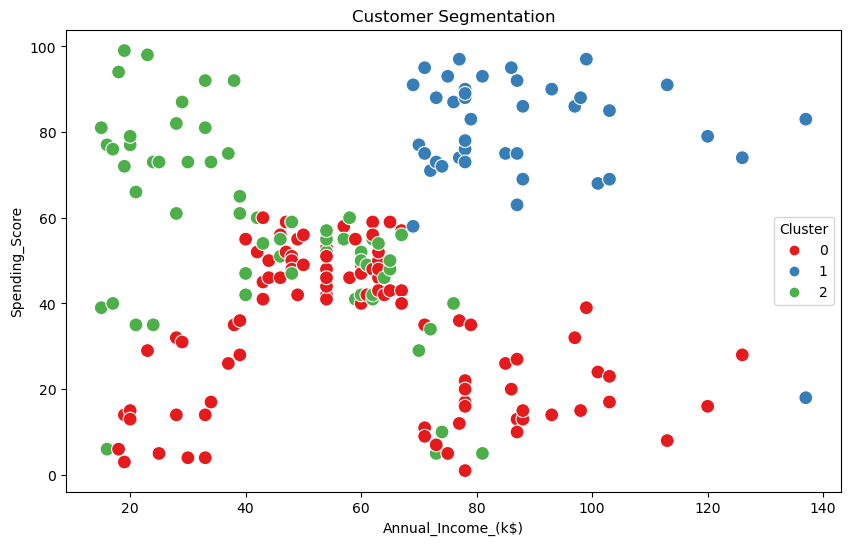

In \[24\]:

    # Example 1: Histogram of a numerical variable
    plt.figure(figsize=(8, 6))
    plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

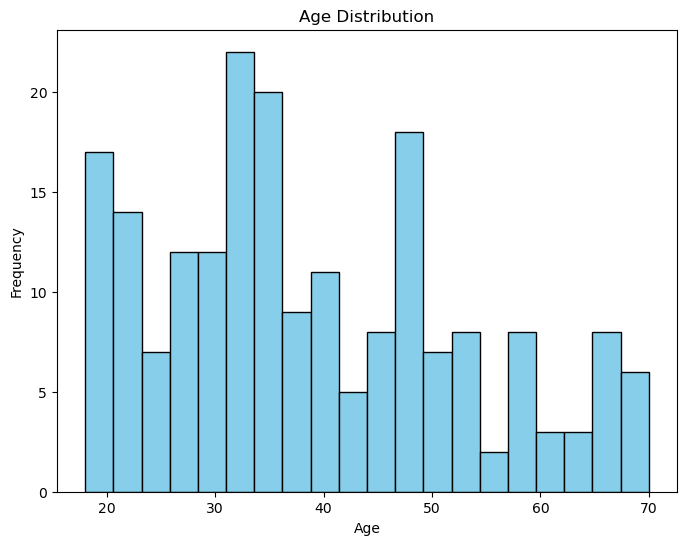

In \[26\]:

    # Example 2: Scatter plot between two numerical variables
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Age'], data['Spending_Score'], color='orange')
    plt.title('Age vs Spending Score')
    plt.xlabel('Age')
    plt.ylabel('Spending_Score')
    plt.show()

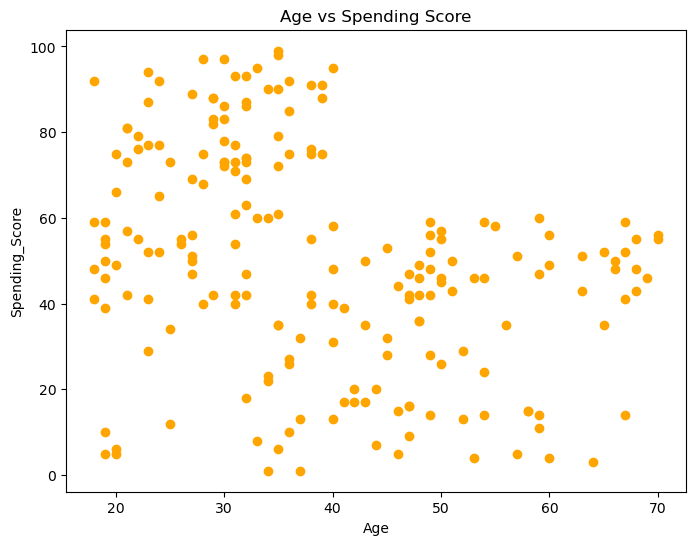

In \[28\]:

    # Example 3: Bar plot of a categorical variable
    plt.figure(figsize=(10, 6))
    data['Genre'].value_counts().plot(kind='bar', color=['blue', 'pink'])
    plt.title('Genre Distribution')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.show()

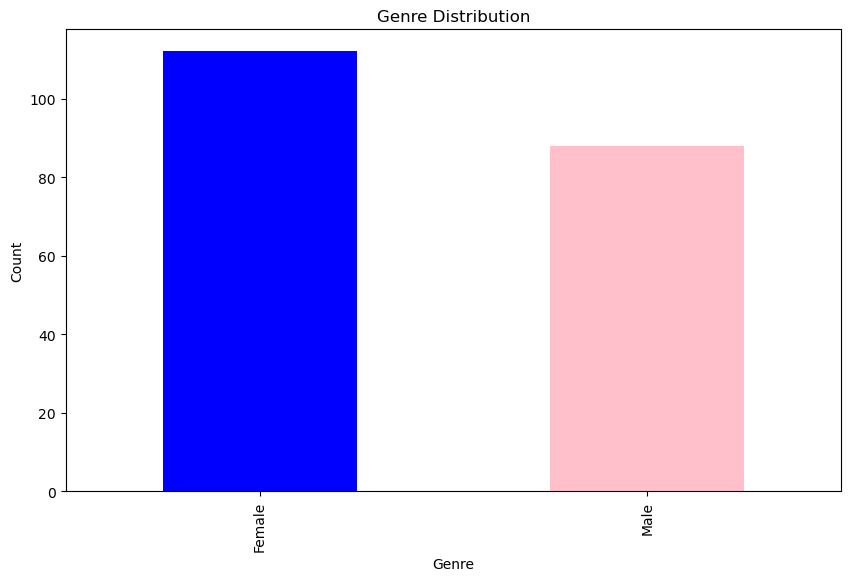

In \[31\]:

    # Example 4: Box plot to visualize the distribution of a numerical variable by a categorical variable
    plt.figure(figsize=(10, 6))
    data.boxplot(column='Annual_Income_(k$)', by='Genre', patch_artist=True, notch=True, vert=0)
    plt.title('Annual Income by Genre')
    plt.xlabel('Annual_Income_(k$)')
    plt.ylabel('Genre')
    plt.show()

    <Figure size 1000x600 with 0 Axes>

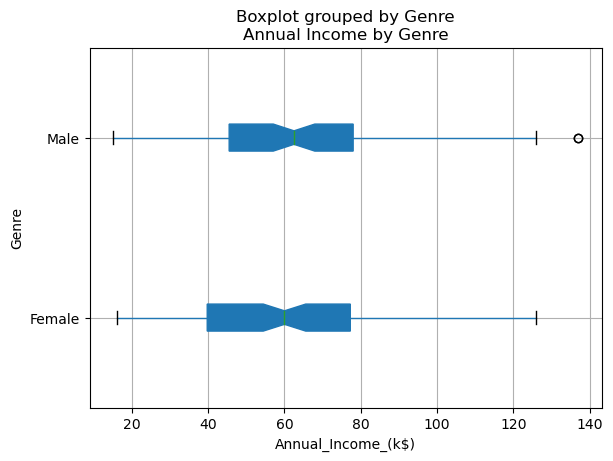

In \[ \]:

     

In \[ \]:

     

In \[ \]: